## Connect to drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## libraries

In [79]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import cv2
from tqdm import tqdm
from PIL import Image
import glob as gb
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D, Conv2D, MaxPool2D, Dense, Flatten, Input, BatchNormalization, Dropout
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
sns.set(rc={'figure.figsize':(15,10)})

## get data from drive and append it to list

In [53]:
x = []
y = []

In [54]:
idx = 0
class_label = 0
test = '/gdrive/My Drive/paper-rock-scissors/train/'
for folder in  os.listdir(test):
    print(folder)
    files = gb.glob(pathname=str( test + folder + '/*.png'))
    # print(files)
    for image in files:
        # print(image)
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv2.resize(data , (227,227))
        x.append(list(image_array))
        y.append(class_label)
        idx = idx + 1
    class_label = class_label + 1

paper
rock
scissors


In [55]:
idx = 0
class_label = 0
test = "/gdrive/My Drive/paper-rock-scissors/test/"
for folder in  os.listdir(test):
    print(folder)
    files = gb.glob(pathname=str( test + folder + '/*.png'))
    # print(files)
    for image in files:
        # print(image)
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv2.resize(data , (227,227))
        x.append(list(image_array))
        y.append(class_label)
        idx = idx + 1
    class_label = class_label + 1

scissors
paper
rock


## Convert to numpy array

In [56]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(2188, 227, 227)
(2188,)


# Scale

In [57]:
x = x/255

In [59]:
y

array([0, 0, 0, ..., 2, 2, 2])

## Split data

In [60]:
x_train, xtest, y_train, ytest = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# apply dummy to y_train 

In [61]:
y_train = np_utils.to_categorical(y_train)

In [62]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Model architecture

In [63]:
model = models.Sequential()

model.add(Input(shape=(227, 227, 1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(3, activation = "softmax"))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [64]:
history = model.fit(x_train,y_train, batch_size= 10, epochs = 30)

Epoch 1/30
154/154 [==============================] - 8s 47ms/step - loss: 1.5546 - accuracy: 0.6688
Epoch 2/30
154/154 [==============================] - 7s 46ms/step - loss: 1.2656 - accuracy: 0.7472
Epoch 3/30
154/154 [==============================] - 7s 46ms/step - loss: 1.2800 - accuracy: 0.7688
Epoch 4/30
154/154 [==============================] - 7s 46ms/step - loss: 0.9233 - accuracy: 0.8106
Epoch 5/30
154/154 [==============================] - 7s 46ms/step - loss: 0.8473 - accuracy: 0.8256
Epoch 6/30
154/154 [==============================] - 7s 46ms/step - loss: 0.9597 - accuracy: 0.8191
Epoch 7/30
154/154 [==============================] - 7s 46ms/step - loss: 0.7692 - accuracy: 0.8491
Epoch 8/30
154/154 [==============================] - 7s 46ms/step - loss: 0.9420 - accuracy: 0.8178
Epoch 9/30
154/154 [==============================] - 7s 47ms/step - loss: 0.8130 - accuracy: 0.8543
Epoch 10/30
154/154 [==============================] - 7s 46ms/step - loss: 0.8359 - accura

# Evaluate data

## loss and accuracy plot

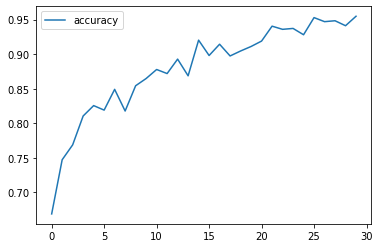

In [65]:
#plot the accuracy
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='accuracy')
plt.legend();

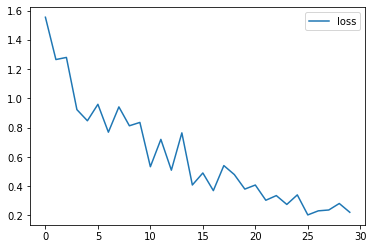

In [66]:
#plot the loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.legend()

## Check evalute in train and test data

In [87]:
# Train
loss, acc = model.evaluate(x_train, y_train)
print('Train')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

48/48 [==============================] - 3s 53ms/step - loss: 0.2672 - accuracy: 0.9628
Train
loss : 0.2672003507614136
acc : 96.27694487571716


In [88]:
# Test
loss, acc = model.evaluate(xtest, np_utils.to_categorical(ytest))
print('Test')
print(f'loss : {loss}')
print(f'acc : {acc*100}')

21/21 [==============================] - 1s 53ms/step - loss: 3.2436 - accuracy: 0.7793
Test
loss : 3.243635654449463
acc : 77.92998552322388


In [70]:
pred = model.predict(xtest)
pred

array([[1.05346836e-01, 7.98240781e-01, 9.64123756e-02],
       [9.80910718e-01, 6.47208863e-14, 1.90893356e-02],
       [9.99986291e-01, 4.62659273e-06, 9.06383866e-06],
       ...,
       [1.05020161e-08, 1.51489377e-02, 9.84851062e-01],
       [3.61682120e-29, 4.41847715e-28, 1.00000000e+00],
       [1.26067548e-07, 9.95050251e-01, 4.94965492e-03]], dtype=float32)

In [71]:
prediction = np.argmax(pred, axis=-1)
prediction

array([1, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2,
       1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2,
       2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1,
       2, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0,
       1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0,
       0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1,

## Confusion matrix

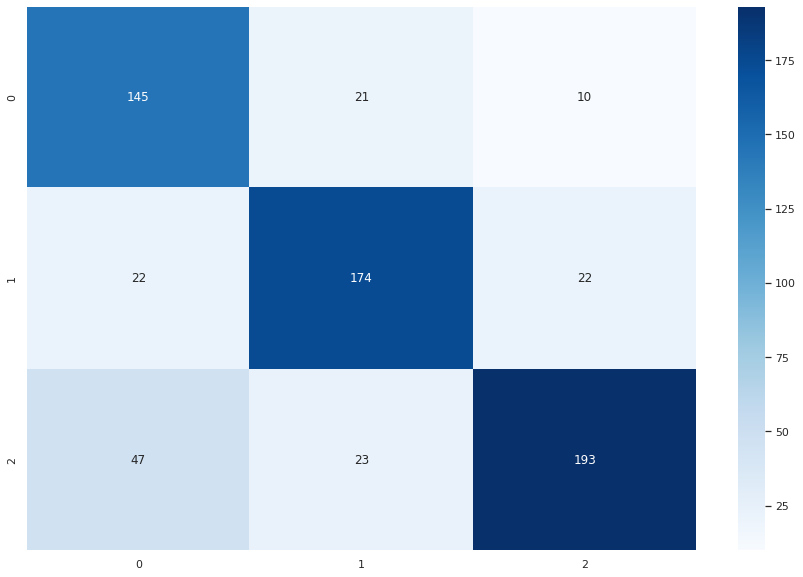

In [92]:
sns.heatmap(confusion_matrix(prediction, ytest), annot=True, fmt='1', cmap='Blues');

## Recall and Precision

In [83]:
print('Model Recall score  : {0:0.4f}'. format(recall_score(ytest, prediction,average='weighted')))
print('Model Precision  : {0:0.4f}'. format(precision_score(ytest, prediction,average='weighted')))

Model Recall score  : 0.7793
Model Precision  : 0.7845


In [84]:
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       214
           1       0.80      0.80      0.80       218
           2       0.73      0.86      0.79       225

    accuracy                           0.78       657
   macro avg       0.79      0.78      0.78       657
weighted avg       0.78      0.78      0.78       657

